In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = pd.read_csv('haberman.csv')
dataset.columns = ['Age', 'Op_Year', 'axil_nodes', 'Surv_status']
print(dataset.shape)
dataset.head()

(305, 4)


,Age,Op_Year,axil_nodes,Surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [14]:
dataset.where(dataset == None).sum()

Age            0.0
Op_Year        0.0
axil_nodes     0.0
Surv_status    0.0
dtype: float64

In [15]:
dataset.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [21]:
dataset_surv = dataset[dataset.Surv_status == 1]
dataset_surv.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,224.000000,224.000000,224.000000,224.0
mean,52.116071,62.857143,2.799107,1.0
std,10.937446,3.229231,5.882237,0.0
min,30.000000,58.000000,0.000000,1.0
25%,43.000000,60.000000,0.000000,1.0
50%,52.000000,63.000000,0.000000,1.0
75%,60.000000,66.000000,3.000000,1.0
max,77.000000,69.000000,46.000000,1.0


In [25]:
dataset_surv.axil_nodes.median()

0.0

In [20]:
dataset_un_surv = dataset[dataset.Surv_status == 2]
dataset_un_surv.describe()

,Age,Op_Year,axil_nodes,Surv_status
count,81.000000,81.000000,81.000000,81.0
mean,53.679012,62.827160,7.456790,2.0
std,10.167137,3.342118,9.185654,0.0
min,34.000000,58.000000,0.000000,2.0
25%,46.000000,59.000000,1.000000,2.0
50%,53.000000,63.000000,4.000000,2.0
75%,61.000000,65.000000,11.000000,2.0
max,83.000000,69.000000,52.000000,2.0


In [26]:
dataset_un_surv.axil_nodes.median()

4.0

# Analysis :

1. There are no values that are unknown ie. dataset is prepared carefully.
2. More the number of axil nodes lesser is the chance of survival. As there is difference between mean and median of both cataegories
3. There are outliers in axil nodes. 
4. All the patients in age gap of 30-34 survive for more than 5 years.
5. 75% of patients whose axil nodes are less than 3 survive for more than 5 years.
6. 75% of patients whose axil node are less than 11 couldn't survive for more than 5 years

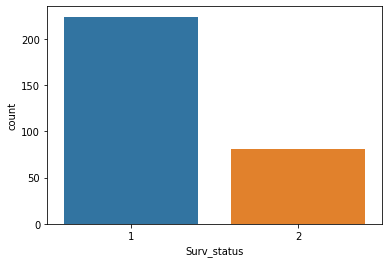

In [23]:
sns.countplot(dataset['Surv_status'])

In [40]:
dataset['Surv_status'].value_counts()/dataset.shape[0]

1    0.734426
2    0.265574
Name: Surv_status, dtype: float64

# Univariate Analysis on Survival status :

1. Dataset set is highly imbalanced.
2. 73% of the patients survived for more than 5 years.

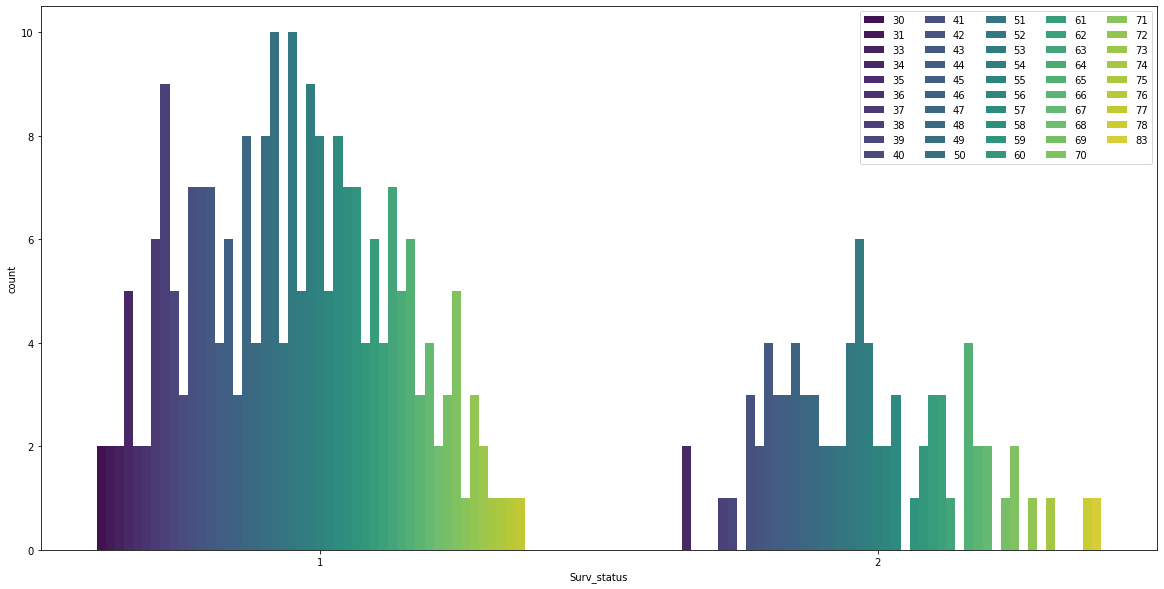

In [69]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'Surv_status',data = dataset, hue = 'Age', palette = 'viridis')
plt.legend(ncol = 5,loc = 1)

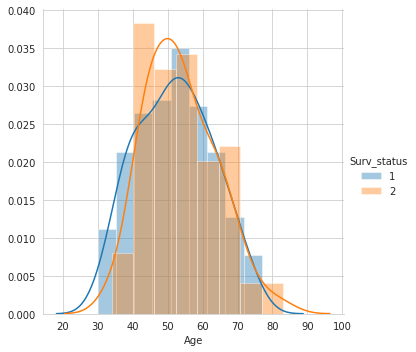

In [107]:
sns.set_style('whitegrid')
sns.FacetGrid(dataset,hue='Surv_status',height=5)\
    .map(sns.distplot,"Age")\
    .add_legend()


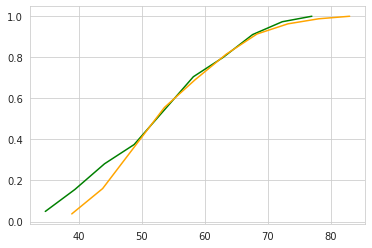

In [112]:
counts , bin_ages_1 = np.histogram(dataset[dataset.Surv_status == 1].Age,bins=10,density=True)
pdf = counts/sum(counts)
cdf_1 = np.cumsum(pdf)

counts , bin_ages_2 = np.histogram(dataset[dataset.Surv_status == 2].Age,bins=10,density=True)
pdf = counts/sum(counts)
cdf_2 = np.cumsum(pdf)


plt.plot(bin_ages_1[1:],cdf_1, color ='green')
plt.plot(bin_ages_2[1:],cdf_2, color = 'orange')


# Univariate Analysis on Age :

1. All the patients whose age was less than 38 at the time of operation survives for more than 5 years.
2. All the patients whose age was greater than 77 at the time of operation survives for less than 5 years.
3. Survival in age gap of 50-70 is similar.
4. patients in age gap 40-60 survived for more than 5 years after Operation.
5. patients who had operation after age of 70 couldn't survive more than 5 years.
6. 80%(approx.) of operation took place in age of 40-70

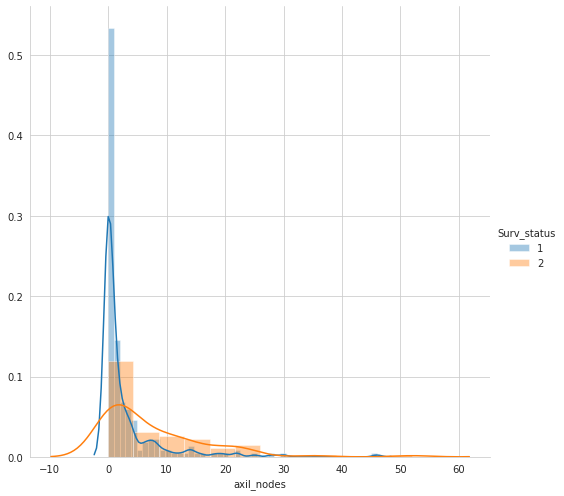

In [83]:
sns.FacetGrid(data = dataset, hue = 'Surv_status', height = 7)\
    .map(sns.distplot, 'axil_nodes')\
    .add_legend()

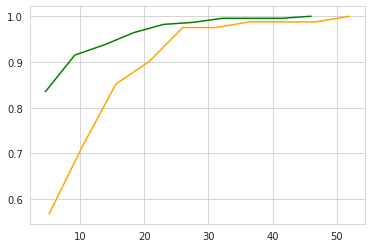

In [115]:
counts , bin_ages_1 = np.histogram(dataset[dataset.Surv_status == 1].axil_nodes,bins=10,density=True)
pdf = counts/sum(counts)
cdf_1 = np.cumsum(pdf)

counts , bin_ages_2 = np.histogram(dataset[dataset.Surv_status == 2].axil_nodes,bins=10,density=True)
pdf = counts/sum(counts)
cdf_2 = np.cumsum(pdf)


plt.plot(bin_ages_1[1:],cdf_1, color ='green')
plt.plot(bin_ages_2[1:],cdf_2, color = 'orange')


# Univariate Analysis on axil nodes :

1. The Person how had less axil node count survive for more than 5 years
2. 92% of people how had less than 10 axil node survive for more than 5 years

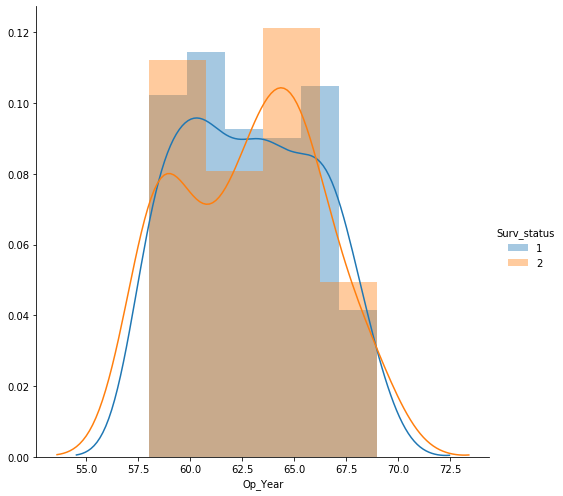

In [4]:
sns.FacetGrid(data = dataset, hue = 'Surv_status', height = 7)\
    .map(sns.distplot, 'Op_Year')\
    .add_legend()

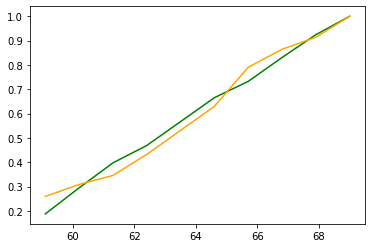

In [5]:
counts , bin_ages_1 = np.histogram(dataset[dataset.Surv_status == 1].Op_Year,bins=10,density=True)
pdf = counts/sum(counts)
cdf_1 = np.cumsum(pdf)

counts , bin_ages_2 = np.histogram(dataset[dataset.Surv_status == 2].Op_Year,bins=10,density=True)
pdf = counts/sum(counts)
cdf_2 = np.cumsum(pdf)


plt.plot(bin_ages_1[1:],cdf_1, color ='green')
plt.plot(bin_ages_2[1:],cdf_2, color = 'orange')

# Univariate Analysis on year of operation:

It very difficult to predict any estimate using this feature as it is very crowded.

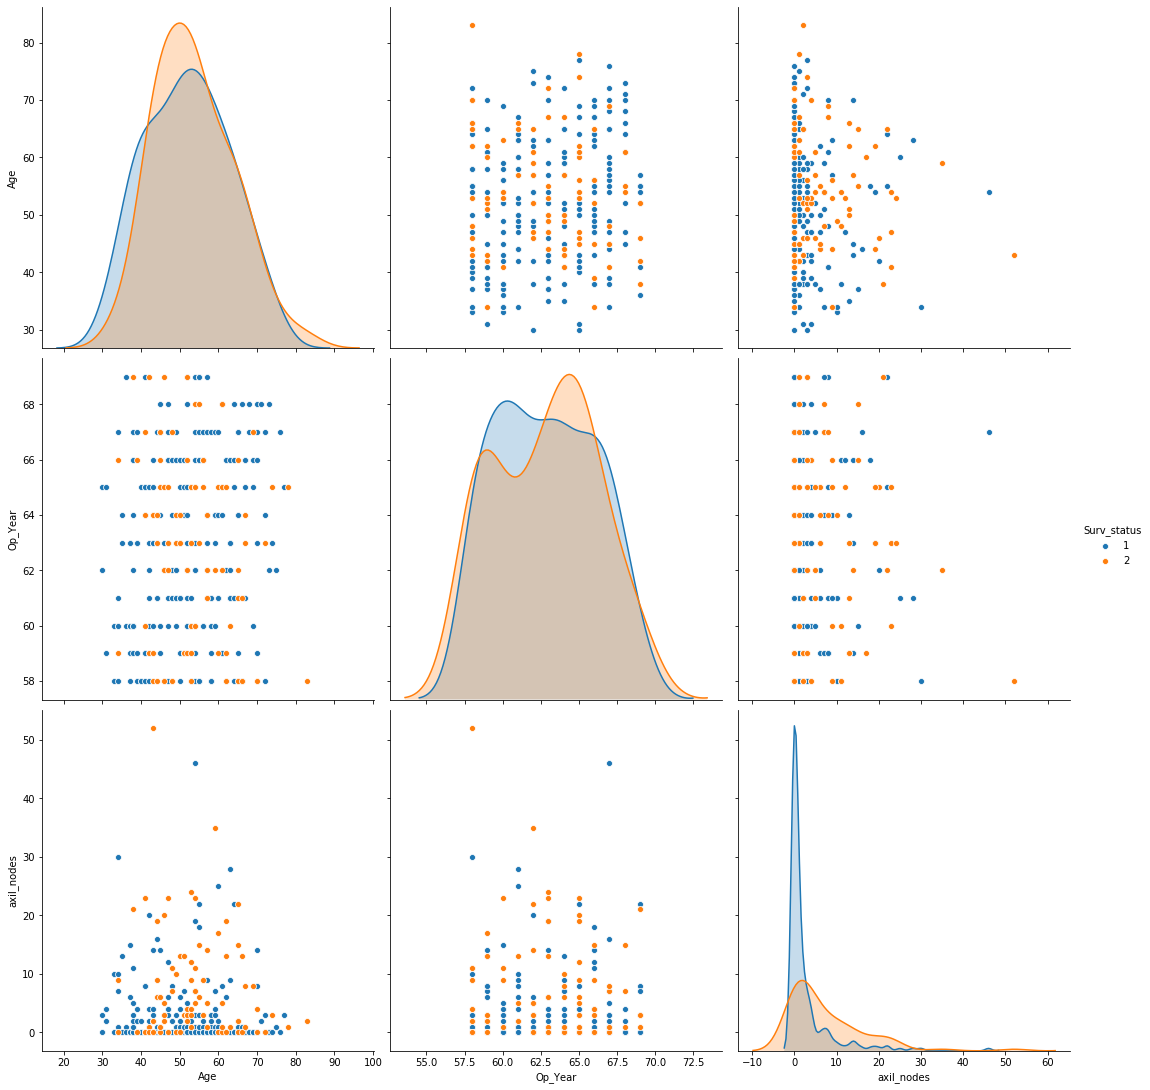

In [8]:
sns.pairplot(dataset, hue = 'Surv_status', height = 5)

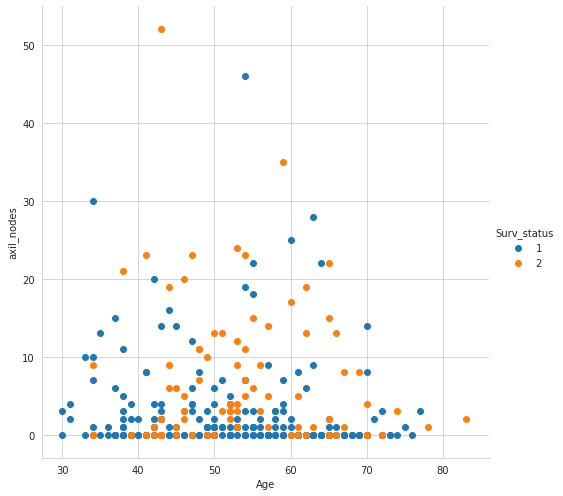

In [77]:
sns.FacetGrid(data = dataset, hue = 'Surv_status', height = 7)\
    .map(plt.scatter, 'Age', 'axil_nodes')\
    .add_legend()

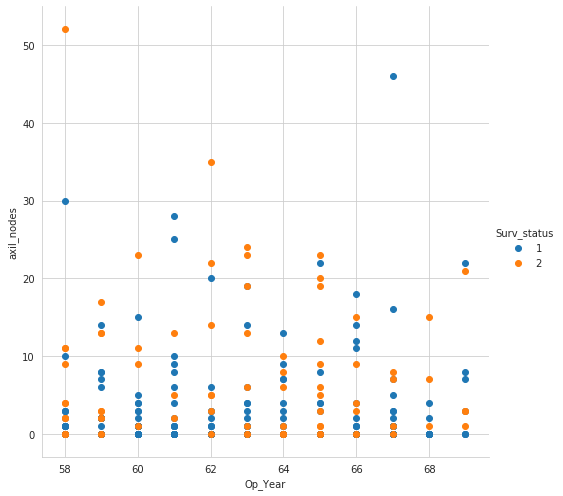

In [81]:
sns.FacetGrid(data = dataset, hue = 'Surv_status', height = 7)\
    .map(plt.scatter, 'Op_Year', 'axil_nodes')\
    .add_legend()

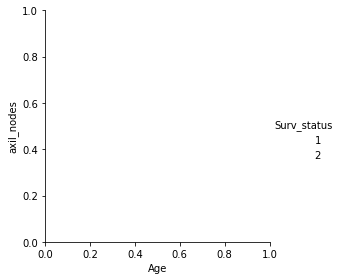

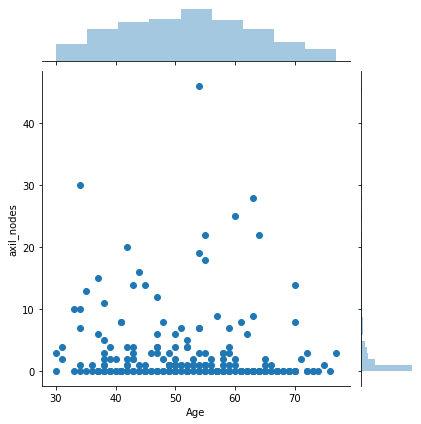

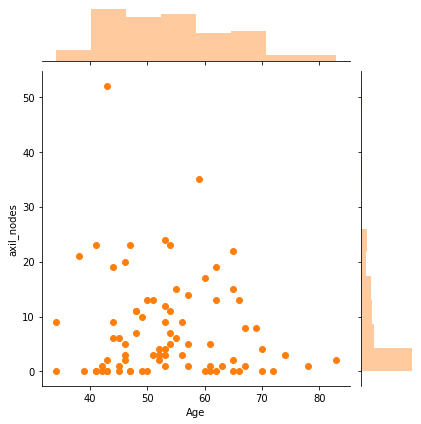

In [15]:
sns.FacetGrid(data = dataset, hue = 'Surv_status', height = 4)\
    .map(sns.jointplot, 'Age', 'axil_nodes')\
    .add_legend()

# Multivariate Analysis :

1. Majority of patients in age group of 50-60 survive more than 5 years who have less than 10 axil nodes.
2. Majority of patients in age group of 30-40 survive more than 5 years.

In [10]:
dataset.corr(method = 'spearman')

,Age,Op_Year,axil_nodes,Surv_status
Age,1.000000,0.093534,-0.097884,0.052806
Op_Year,0.093534,1.000000,-0.036001,-0.007028
axil_nodes,-0.097884,-0.036001,1.000000,0.327468
Surv_status,0.052806,-0.007028,0.327468,1.000000


# Conclusion :

Order of relevance of features for cancer survival prediction is \
number of axil nodes > Age of patient > year of operation